In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

## データ準備

In [2]:
df = sns.load_dataset("tips")
df["tip_rate"] = df["tip"] / df["total_bill"]
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


## 分布の描画

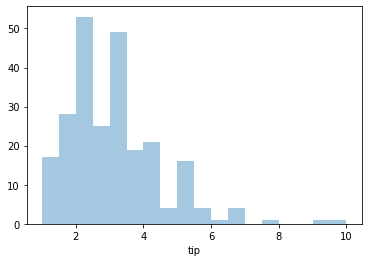

In [6]:
sns.distplot(df["tip"], kde=False)

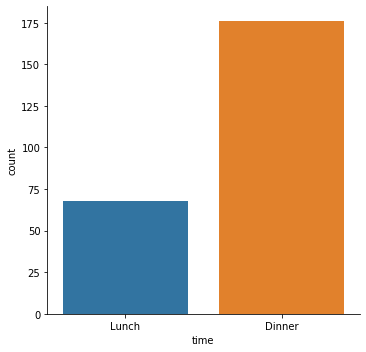

In [8]:
sns.catplot("time", data=df, kind="count")

## 平均値

In [12]:
np.mean(df["tip_rate"])

0.16080258172250478

In [13]:
df["tip_rate"].mean()

0.16080258172250478

In [15]:
df.groupby("sex").mean()["tip_rate"]

sex
Male      0.157651
Female    0.166491
Name: tip_rate, dtype: float64

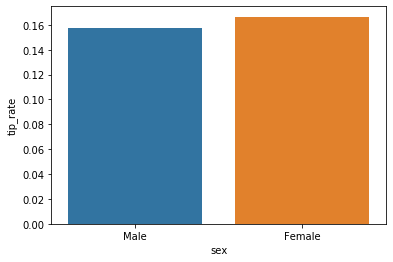

In [17]:
sns.barplot("sex", y="tip_rate", data=df, ci=None)

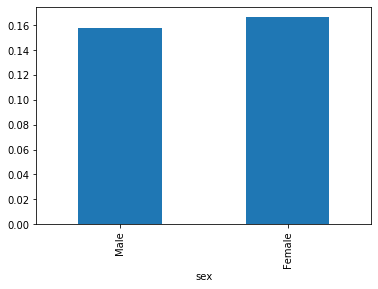

In [18]:
df.groupby("sex").mean()["tip_rate"].plot(kind="bar")

## 中央値

In [19]:
np.median(df["tip_rate"])

0.15476977125802577

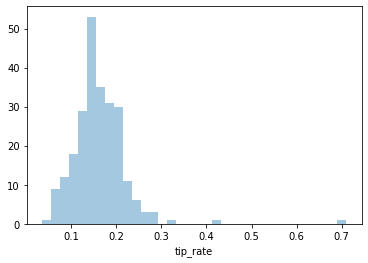

In [20]:
sns.distplot(df["tip_rate"], kde=False)

In [21]:
df["tip_rate"].median()

0.15476977125802577

In [22]:
df.groupby("sex").median()

,total_bill,tip,size,tip_rate
sex,,,,
Male,18.35,3.00,2,0.153492
Female,16.40,2.75,2,0.155581


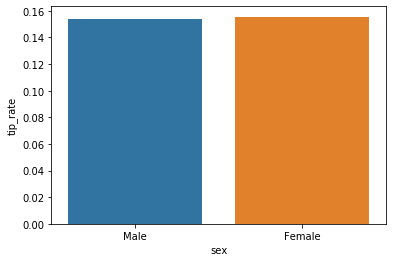

In [24]:
sns.barplot(x="sex", y="tip_rate", data=df, estimator=np.median, ci=None)

In [27]:
df.sort_values("tip_rate", ascending=True)

,total_bill,tip,sex,smoker,day,time,size,tip_rate
237,32.83,1.17,Male,Yes,Sat,Dinner,2,0.035638
102,44.30,2.50,Female,Yes,Sat,Dinner,3,0.056433
57,26.41,1.50,Female,No,Sat,Dinner,2,0.056797
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
187,30.46,2.00,Male,Yes,Sun,Dinner,5,0.065660
...,...,...,...,...,...,...,...,...
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667


## 最頻値

In [33]:
mode, count = stats.mode(df)

In [35]:
print(mode)
print(count)

[[13.42 2.0 'Male' 'No' 'Sat' 'Dinner' 2 0.1448225923244026]]
[[  3  33 157 151  87 176 156   2]]


In [38]:
df["tip_rate"].mode()

0    0.144823
1    0.153846
dtype: float64

In [37]:
mode, count = stats.mode(df["size"])
print(mode, count)

[2] [156]


## 範囲

In [4]:
np.min(df['tip'])

1.0

In [5]:
df['tip'].min()

1.0

In [6]:
df.groupby('sex').min()

,total_bill,tip,size,tip_rate
sex,,,,
Male,7.25,1.0,1,0.035638
Female,3.07,1.0,1,0.056433


In [7]:
np.max(df['tip'])

10.0

In [8]:
df['tip'].max()

10.0

In [9]:
df.groupby('sex').max()

,total_bill,tip,size,tip_rate
sex,,,,
Male,50.81,10.0,6,0.710345
Female,44.30,6.5,6,0.416667


## 四分位数

In [14]:
np.quantile(df['tip_rate'], [0.25, 0.5, 0.75])

array([0.12912736, 0.15476977, 0.19147549])

In [16]:
df['tip_rate'].quantile([0.25, 0.5, 0.75])

0.25    0.129127
0.50    0.154770
0.75    0.191475
Name: tip_rate, dtype: float64

In [18]:
stats.iqr(df['tip_rate']) / 2

0.03117406229344577

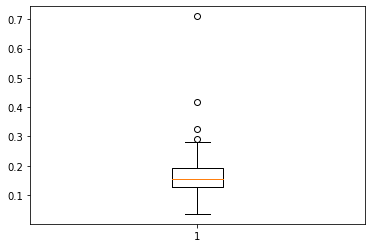

In [22]:
plt.boxplot(df['tip_rate'])
plt.show()

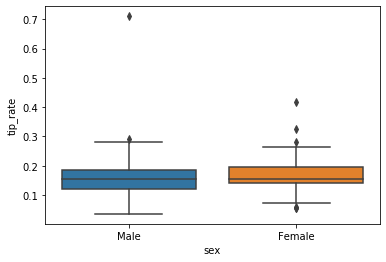

In [25]:
sns.boxplot(x='sex', y='tip_rate', data=df)

## 分散と標準偏差

In [4]:
np.var(df['tip_rate'])

0.0037145280013546928

In [5]:
np.std(df['tip_rate'])

0.060946927743362855

In [6]:
np.sqrt(np.var(df['tip_rate']))

0.060946927743362855

## 共分散

In [8]:
np.cov(df["total_bill"], df["tip"], bias=True)

array([[78.92813149,  8.28938892],
       [ 8.28938892,  1.90660851]])

In [14]:
x = np.stack([df["total_bill"], df["tip"], df["size"]], axis=0)
np.cov(x, bias=True)

array([[78.92813149,  8.28938892,  5.04522121],
       [ 8.28938892,  1.90660851,  0.64126747],
       [ 5.04522121,  0.64126747,  0.9008835 ]])

## 相関係数

In [15]:
np.corrcoef(df["total_bill"], df["tip"])

array([[1.        , 0.67573411],
       [0.67573411, 1.        ]])

In [16]:
x = np.stack([df["total_bill"], df["tip"], df["size"]], axis=0)
np.corrcoef(x)

array([[1.        , 0.67573411, 0.59831513],
       [0.67573411, 1.        , 0.48929878],
       [0.59831513, 0.48929878, 1.        ]])

In [17]:
df.corr()

,total_bill,tip,size,tip_rate
total_bill,1.000000,0.675734,0.598315,-0.338624
tip,0.675734,1.000000,0.489299,0.342370
size,0.598315,0.489299,1.000000,-0.142860
tip_rate,-0.338624,0.342370,-0.142860,1.000000


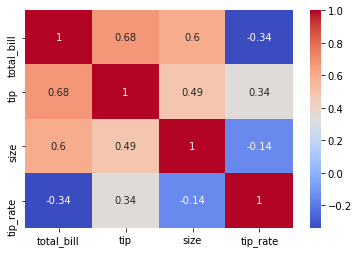

In [19]:
sns.heatmap(df.corr(), cmap="coolwarm", annot=True)

## 連関

In [23]:
pd.crosstab(df["sex"], df["time"])

time,Lunch,Dinner
sex,,
Male,33,124
Female,35,52


In [25]:
cont_table = pd.crosstab(df["sex"], df["time"])
stats.chi2_contingency(cont_table, correction=False)

(10.277251918677742,
 0.0013468039268008766,
 1,
 array([[ 43.75409836, 113.24590164],
        [ 24.24590164,  62.75409836]]))

## クラメールの連関係数

In [35]:
def cramers_v(x, y):
    cont_table = pd.crosstab(df["sex"], df["time"])
    chi2 = stats.chi2_contingency(cont_table, correction=False)[0]
    min_d = min(cont_table.shape) - 1
    n = len(x)
    v = np.sqrt(chi2/(min_d*n))
    return v

In [36]:
cramers_v(df["sex"], df["time"])

0.20523129613344476

## 確率分布

In [8]:
stats.randint(1, 7).rvs()

4

In [16]:
stats.uniform(0, 1).rvs()

0.04142968153472848

## 確率分布の描画

In [32]:
def simple_func(x):
    return 2*x + 3

In [33]:
simple_func(10)

23

In [34]:
x = np.linspace(-3, 3, 100)
y = simple_func(x)

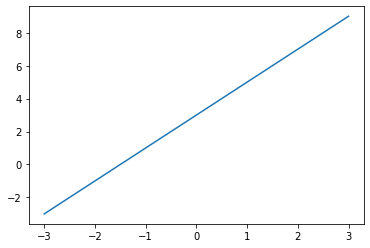

In [35]:
plt.plot(x, y)

In [38]:
x

array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18

In [37]:
z = np.arange(-3, 4)
z

array([-3, -2, -1,  0,  1,  2,  3])

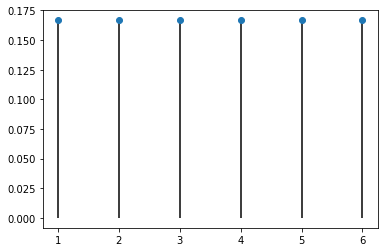

In [43]:
x = np.arange(1, 7)
y = stats.randint(1, 7).pmf(x)
plt.plot(x, y, "o")
plt.vlines(x, 0, y)

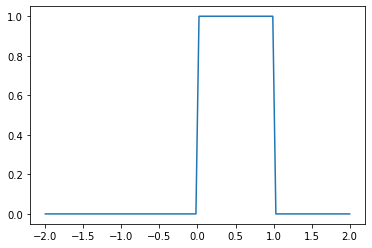

In [45]:
x = np.linspace(-2, 2, 100)
y = stats.uniform(loc=0, scale=1).pdf(x)
plt.plot(x, y)

## 累積分布関数

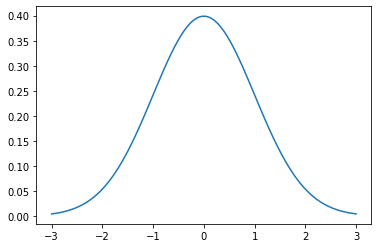

In [46]:
x = np.linspace(-3, 3, 100)
y = stats.norm.pdf(x)
plt.plot(x, y)

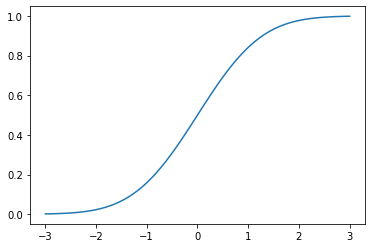

In [47]:
y = stats.norm.cdf(x)
plt.plot(x, y)

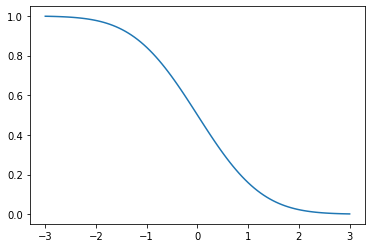

In [48]:
y = stats.norm.sf(x)
plt.plot(x, y)

## 正規分布

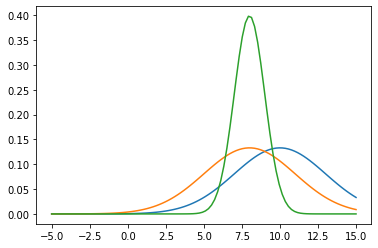

In [64]:
x = np.linspace(-5, 15, 100)
y = stats.norm(loc=10, scale=3).pdf(x)
y2 = stats.norm(loc=8, scale=3).pdf(x)
y3 = stats.norm(loc=8, scale=1).pdf(x)
plt.plot(x, y)
plt.plot(x, y2)
plt.plot(x, y3)

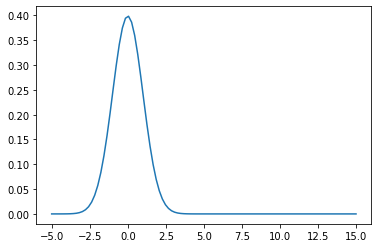

In [65]:
y = stats.norm.pdf(x)
plt.plot(x, y)

## KDE

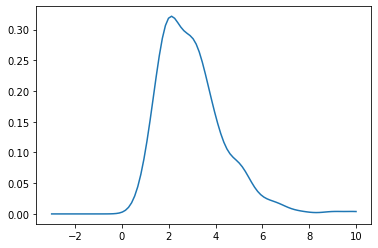

In [70]:
x = np.linspace(-3, 10, 100)
y = stats.gaussian_kde(df["tip"]).pdf(x)
plt.plot(x, y)

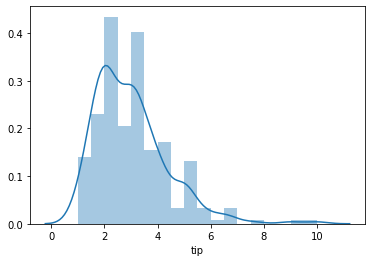

In [72]:
sns.distplot(df["tip"], kde=True)

In [73]:
stats.gaussian_kde(df["tip"]).resample()

array([[ 1.857529  ,  2.54969064,  3.57535072,  2.92346429,  3.23063117,
         4.03164682,  2.2137909 ,  2.14104727,  5.30339051,  5.52876655,
         2.19688769,  3.35474593,  2.38533602,  1.44389644,  2.63587224,
         3.98910617,  1.4463859 ,  1.17855077,  2.48746136,  2.76093784,
         2.0457208 ,  1.02979664,  5.27090313,  2.63131931,  1.69632887,
         3.14281936,  1.05127009,  2.08317942,  3.50323508,  4.43704181,
         1.72152816,  1.41917214,  1.08365559,  4.47572721,  1.15655004,
         3.306381  ,  3.18922775,  1.79209505,  2.8968088 ,  2.95901382,
         2.47416255,  3.41580244,  1.72217594,  4.04764127,  1.39475102,
         5.84109739,  2.2149213 ,  1.66177553,  3.31090548,  2.00878074,
         2.42929676,  4.28905047,  6.04907817,  2.72867218,  5.48465099,
         3.16445303,  4.5755469 ,  1.94644821,  2.72818549,  6.69276173,
         2.65144005,  1.7308234 ,  6.3883914 ,  4.45101839,  1.13323156,
         3.19389482,  2.04963587,  1.42049623,  2.6

## 63-95-99.7ルール

In [79]:
group1 = []
group2 = []
group3 = []
samples = []
loc = 4
scale = 3

for i in range(1000):
    sample = stats.norm(loc=loc, scale=scale).rvs()
    if loc-scale < sample < loc+scale:
        group1.append(sample)
    elif loc-2*scale < sample < loc+2*scale:
        group2.append(sample)
    elif loc-3*scale < sample < loc+3*scale:
        group3.append(sample)
    samples.append(sample)

In [82]:
print(len(group1)/len(samples))
print((len(group1) + len(group2))/len(samples))
print((len(group1) + len(group2) + len(group3))/len(samples))

0.676
0.932
0.995


## 標準化

In [85]:
scaler = StandardScaler()

In [86]:
scaler.fit_transform([[1], [2], [3], [4]])

array([[-1.34164079],
       [-0.4472136 ],
       [ 0.4472136 ],
       [ 1.34164079]])

In [92]:
scaled = scaler.fit_transform(df["tip_rate"].values.reshape(-1, 1))
scaled

array([[-1.66301817e+00],
       [-4.28234299e-03],
       [ 9.49146717e-02],
       [-3.44925940e-01],
       [-2.29624968e-01],
       [ 4.17363756e-01],
       [ 1.10337948e+00],
       [-7.33936144e-01],
       [-5.00163567e-01],
       [ 9.47315739e-01],
       [ 9.35535257e-02],
       [-3.11727577e-01],
       [-9.67838090e-01],
       [ 3.24134057e-02],
       [ 7.02885077e-01],
       [ 3.42053237e-01],
       [ 1.41511894e-02],
       [ 1.09840651e+00],
       [ 7.45627991e-01],
       [ 2.33813456e-02],
       [ 1.09728238e+00],
       [-4.14587519e-01],
       [-3.18225155e-01],
       [ 5.16606793e-01],
       [-5.88357399e-03],
       [-4.82644844e-01],
       [-1.83995336e-01],
       [-5.24746516e-02],
       [ 6.12895542e-01],
       [-1.33408300e-01],
       [-1.47179215e-01],
       [-4.03019490e-01],
       [ 6.30066304e-01],
       [-6.95488521e-01],
       [ 3.79214012e-01],
       [-1.83383264e-01],
       [-6.26420825e-01],
       [ 3.36888626e-01],
       [-6.1

In [95]:
#標準化
scaled * 10 + 50

array([[ 33.36981828],
       [ 49.95717657],
       [ 50.94914672],
       [ 46.5507406 ],
       [ 47.70375032],
       [ 54.17363756],
       [ 61.03379478],
       [ 42.66063856],
       [ 44.99836433],
       [ 59.47315739],
       [ 50.93553526],
       [ 46.88272423],
       [ 40.3216191 ],
       [ 50.32413406],
       [ 57.02885077],
       [ 53.42053237],
       [ 50.14151189],
       [ 60.98406513],
       [ 57.45627991],
       [ 50.23381346],
       [ 60.97282376],
       [ 45.85412481],
       [ 46.81774845],
       [ 55.16606793],
       [ 49.94116426],
       [ 45.17355156],
       [ 48.16004664],
       [ 49.47525348],
       [ 56.12895542],
       [ 48.665917  ],
       [ 48.52820785],
       [ 45.9698051 ],
       [ 56.30066304],
       [ 43.04511479],
       [ 53.79214012],
       [ 48.16616736],
       [ 43.73579175],
       [ 53.36888626],
       [ 43.8951679 ],
       [ 49.8515239 ],
       [ 46.52948726],
       [ 47.48515471],
       [ 59.63290777],
       [ 45

In [89]:
list_a = [1, 2, 3, 4]
list_a[-1]

4

In [93]:
scaler.fit_transform(df[["total_bill", "tip_rate"]])

array([[-3.14711305e-01, -1.66301817e+00],
       [-1.06323531e+00, -4.28234299e-03],
       [ 1.37779900e-01,  9.49146717e-02],
       [ 4.38315103e-01, -3.44925940e-01],
       [ 5.40744704e-01, -2.29624968e-01],
       [ 6.19536705e-01,  4.17363756e-01],
       [-1.23995452e+00,  1.10337948e+00],
       [ 7.98507107e-01, -7.33936144e-01],
       [-5.34203307e-01, -5.00163567e-01],
       [-5.63468908e-01,  9.47315739e-01],
       [-1.07111451e+00,  9.35535257e-02],
       [ 1.74175992e+00, -3.11727577e-01],
       [-4.91430507e-01, -9.67838090e-01],
       [-1.52624903e-01,  3.24134057e-02],
       [-5.57840908e-01,  7.02885077e-01],
       [ 2.01939101e-01,  3.42053237e-01],
       [-1.06436091e+00,  1.41511894e-02],
       [-3.93503306e-01,  1.09840651e+00],
       [-3.16962505e-01,  7.45627991e-01],
       [ 9.72582994e-02,  2.33813456e-02],
       [-2.10030504e-01,  1.09728238e+00],
       [ 5.67366990e-02, -4.14587519e-01],
       [-4.52034507e-01, -3.18225155e-01],
       [ 2.

## 二項分布

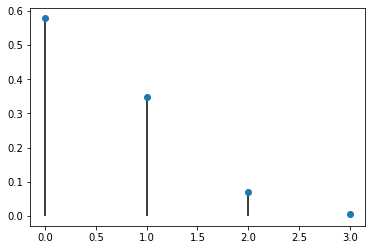

In [97]:
n = 3
x = np.arange(n+1)
y = stats.binom(n=n, p=1/6).pmf(x)
plt.plot(x, y, "o")
plt.vlines(x, 0, y)

## 二項分布->正規分布

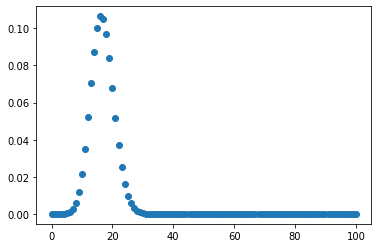

In [98]:
n = 100
p = 1/6
x = np.arange(n+1)
y = stats.binom(n, p).pmf(x)
plt.plot(x, y, "o")

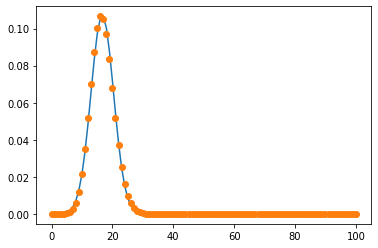

In [104]:
y2 = stats.norm(n*p, np.sqrt(n*p*(1-p))).pdf(x)
plt.plot(x, y2)
plt.plot(x, y, "o")

In [99]:
stats.binom(n, p).mean()

16.666666666666664

In [100]:
n*p

16.666666666666664

In [101]:
stats.binom(n, p).var()

13.888888888888888

In [102]:
n*p*(1-p)

13.888888888888888

## 標本分布

In [9]:
m = 100
n = 50
column = "tip"
sample_means = []
for i in range(m):
    sampled_df = df.sample(n)
    sample_mean = sampled_df[column].mean()
    sample_means.append(sample_mean)

In [13]:
np.mean(sample_means)

2.980476

In [15]:
df[column].mean()

2.9982786885245902

In [16]:
np.var(sample_means)

0.03821118302399998

In [18]:
np.var(df[column]) / n

0.03813217024993285

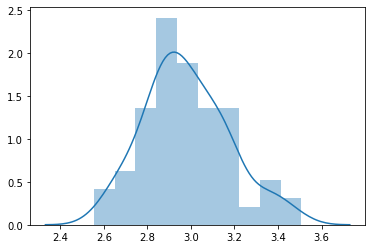

In [12]:
sns.distplot(sample_means)

## 不偏分散

In [19]:
stats.tvar(df["tip"])

1.914454638062471

In [22]:
np.var(df["tip"], ddof=1)

1.9144546380624725

In [23]:
np.sqrt(stats.tvar(df["tip"]))

1.3836381890011822

In [25]:
np.std(df["tip"], ddof=1)

1.3836381890011826

## 普遍分散の不偏性

In [45]:
n = 100
m = 50
column = "tip"
sample_tvars = []
sample_vars = []
for i in range(n):
    sample_df = df.sample(m)
    sample_tvar = stats.tvar(sample_df[column])
    sample_tvars.append(sample_tvar)
    sample_var = np.var(sample_df[column])
    sample_vars.append(sample_var)

In [46]:
np.mean(sample_tvars)

1.8619280865306123

In [47]:
np.var(df[column])

1.9066085124966428

In [48]:
np.mean(sample_vars)

1.8246895248000001

## 比率の区間推定

In [3]:
stats.binom.interval(0.95, 1000, 0.6)

(570.0, 630.0)

In [4]:
stats.binom.interval(0.99, 1000, 0.6)

(560.0, 640.0)

In [45]:
column = "sex"
n = 100
m = 50
alpha = 0.95
population_male_ration = len(df[df[column] == "Male"]) / len(df)
results = []
for _ in range(n):
    sample_df = df.sample(m)
    male_ration = len(sample_df[sample_df[column]=="Male"]) / len(sample_df)
    min_num, max_num = stats.binom.interval(alpha, m, male_ration)
    min_ration = min_num / m
    max_ration = max_num / m
    correct = min_ration < population_male_ration < max_ration
    results.append({"min": min_ration, "max": max_ration, "correct": correct})

In [46]:
result_df = pd.DataFrame(results)
result_df["correct"].value_counts()

True     94
False     6
Name: correct, dtype: int64

## 平均の区間推定

In [97]:
m = 100
n = 50
alpha = 0.95
answer_mean = df["tip"].mean()
results = []
for _ in range(m):
    sample_tip = df["tip"].sample(n)
    sample_tip_mean = sample_tip.mean()
    sample_tip_var = stats.tvar(sample_tip)
    min_mean, max_mean = stats.norm.interval(alpha, sample_tip_mean, np.sqrt(sample_tip_var/n))
    correct = min_mean < answer_mean < max_mean
    results.append({"min": min_mean, "max": max_mean, "correct":correct})

In [98]:
result_df = pd.DataFrame(results)
result_df["correct"].value_counts()

True     99
False     1
Name: correct, dtype: int64

## t分布

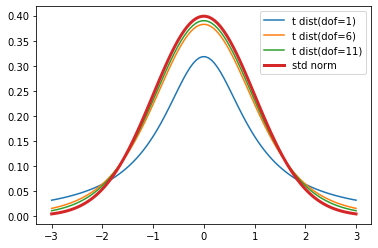

In [108]:
x = np.linspace(-3, 3, 100)
z = stats.norm.pdf(x)
for dof in range(1, 12, 5):
    t = stats.t(dof).pdf(x)
    plt.plot(x, t, label=f"t dist(dof={dof})")
plt.plot(x, z, label="std norm", linewidth=3)
plt.legend()

## 平均の区間推定(正規分布とt分布)

In [309]:
m = 100
n = 50
alpha = 0.95
column = "tip"
answer = df[column].mean()
results1 = []
results2 = []
for _ in range(m):
    sample_df = df[column].sample(n)
    sample_mean = sample_df.mean()
    sample_var = stats.tvar(sample_df)
    min_mean1, max_mean1 = stats.norm.interval(alpha, loc=sample_mean, scale=np.sqrt(sample_var/n))
    correct1 = min_mean1 < answer < max_mean1
    results1.append({"min_mean1": min_mean1, "max_mean1": max_mean1, "correct1": correct1})
    min_mean2, max_mean2 = stats.t.interval(alpha, loc=sample_mean, scale=np.sqrt(sample_var/n), df=n-1)
    correct2 = min_mean2 < answer < max_mean2
    results2.append({"min_mean2": min_mean2, "max_mean2": max_mean2, "correct2": correct2})

In [310]:
df1 = pd.DataFrame(results1)
df1["correct1"].value_counts()

True     98
False     2
Name: correct1, dtype: int64

In [311]:
df2 = pd.DataFrame(results2)
df2["correct2"].value_counts()

True     99
False     1
Name: correct2, dtype: int64

In [317]:
df1

,min_mean1,max_mean1,correct1
0,2.463673,3.103927,True
1,2.720861,3.421139,True
2,2.575433,3.177367,True
3,2.869300,3.639100,True
4,2.377844,3.185356,True
...,...,...,...
95,2.604987,3.311813,True
96,2.655853,3.298947,True
97,2.853020,3.744980,True
98,2.709069,3.378931,True


In [320]:
df1["distance"] = df1["max_mean1"] - df1["min_mean1"]
df1["distance"].mean()

0.7697884954397425

In [322]:
df2["distance"] = df2["max_mean2"] - df2["min_mean2"]
df2["distance"].mean()

0.7892736338180414